Optimal k: 2
Cross-Validation Accuracy: -1.58


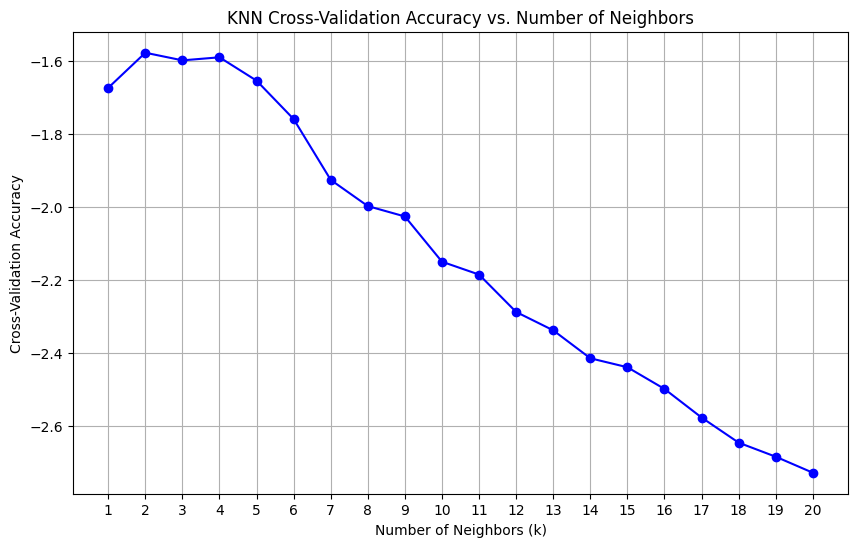

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

df=pd.read_csv('/content/Advertising Budget and Sales.xls')
df.head()
df.drop('Unnamed: 0',axis=1,inplace=True)
x=df.drop('Sales ($)',axis =1)
y=df['Sales ($)']


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Find the optimal k using cross-validation
k_values = range(1, 21)  # Test k values from 1 to 20
cv_scores = []  # List to store cross-validation scores

# Perform cross-validation for each k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')  # 5-fold CV
    cv_scores.append(scores.mean())

# Determine the best k
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal k: {optimal_k}")
print(f"Cross-Validation Accuracy: {max(cv_scores):.2f}")

# Plot the cross-validation accuracy against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Cross-Validation Accuracy vs. Number of Neighbors')
plt.xticks(k_values)
plt.grid()
plt.show()

# Train the KNN model with the optimal k
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(x_train, y_train)

# Evaluate the model on the test set
y_pred = knn.predict(x_test)
accuracy = knn.score(x_test, y_pred)
